In [21]:
import pandas as pd
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from datasets import load_dataset
import cupy as cp
import matplotlib as plt
import seaborn as sns
from seaborn import heatmap
import numpy as np

In [22]:
# Load Dataset
# data = pd.read_csv('combined_articles.csv')  # Replace with your dataset file
# data = pd.read_csv('combined_articles_final.csv')
data = pd.read_csv('combined_articles_cleaned.csv')
data.head()

,id,title,link,content,gold_label
0,0,ہم لکھنے والے ایک بے ایمان معاشرہ میں سانس لے ...,https://urdu.arynews.tv/intezar-hussain-urdu-w...,سوچتا ہوں غالب س کتن مختلف زمان جی رہ ہیں شخص ...,entertainment
1,1,’’کیا اُدھر باغ بھی ہے؟‘‘,https://urdu.arynews.tv/lakhnau-nawab-mahalsara/,محمد حسین آزاد ن میر ک بار واقعہ لکھا ہ انھوں...,entertainment
2,2,کچھ زخمی کہہ رہے تھے کہ وہ زندہ ہیں…,https://urdu.arynews.tv/politics-and-politicia...,وطنِ عزیز سیاست دار و مدار رہ ہ جماعت ن کتنا ب...,entertainment
3,3,آگرے والا عبدالکریم اور ملکہ وکٹوریہ,https://urdu.arynews.tv/munshi-abdul-karim-and...,پیار شوہر البرٹ ب حد عزیز ملازم جان بران ک مرن...,entertainment
4,4,"""چچی سیدانی تھیں….”",https://urdu.arynews.tv/aslam-parvez-khaka/,خاکہ نگاری اردو مقبول صنف رہی ہ زیادہ تر اہلِ ...,entertainment


In [23]:
def load_stopwords(file_path):
    # Open the file and read the stopwords
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = file.read().splitlines()  # Read and remove any extra whitespace/newlines
    return stopwords

# Path to your stopwords.txt file
file_path = 'stopwords-ur.txt'

# Load stopwords from the file
stopwords = load_stopwords(file_path)

# Display the stopwords list
print(stopwords)

['آئی', 'آئے', 'آج', 'آخر', 'آخرکبر', 'آدهی', 'آًب', 'آٹھ', 'آیب', 'اة', 'اخبزت', 'اختتبم', 'ادھر', 'ارد', 'اردگرد', 'ارکبى', 'اش', 'اضتعوبل', 'اضتعوبلات', 'اضطرذ', 'اضکب', 'اضکی', 'اضکے', 'اطراف', 'اغیب', 'افراد', 'الگ', 'اور', 'اوًچب', 'اوًچبئی', 'اوًچی', 'اوًچے', 'اى', 'اً', 'اًذر', 'اًہیں', 'اٹھبًب', 'اپٌب', 'اپٌے', 'اچھب', 'اچھی', 'اچھے', 'اکثر', 'اکٹھب', 'اکٹھی', 'اکٹھے', 'اکیلا', 'اکیلی', 'اکیلے', 'اگرچہ', 'اہن', 'ایطے', 'ایک', 'ب', 'ت', 'تبزٍ', 'تت', 'تر', 'ترتیت', 'تریي', 'تعذاد', 'تن', 'تو', 'توبم', 'توہی', 'توہیں', 'تٌہب', 'تک', 'تھب', 'تھوڑا', 'تھوڑی', 'تھوڑے', 'تھی', 'تھے', 'تیي', 'ثب', 'ثبئیں', 'ثبترتیت', 'ثبری', 'ثبرے', 'ثبعث', 'ثبلا', 'ثبلترتیت', 'ثبہر', 'ثدبئے', 'ثرآں', 'ثراں', 'ثرش', 'ثعذ', 'ثغیر', 'ثلٌذ', 'ثلٌذوثبلا', 'ثلکہ', 'ثي', 'ثٌب', 'ثٌبرہب', 'ثٌبرہی', 'ثٌبرہے', 'ثٌبًب', 'ثٌذ', 'ثٌذکرو', 'ثٌذکرًب', 'ثٌذی', 'ثڑا', 'ثڑوں', 'ثڑی', 'ثڑے', 'ثھر', 'ثھرا', 'ثھراہوا', 'ثھرپور', 'ثھی', 'ثہت', 'ثہتر', 'ثہتری', 'ثہتریي', 'ثیچ', 'ج', 'خب', 'خبرہب', 'خبرہی', 'خبرہے', 'خبهوظ

In [24]:
def preprocess_text(text, stopwords):
    # Tokenize text and remove stopwords
    tokens = text.split()
    return ' '.join([token for token in tokens if token not in stopwords and token.isalnum()])

# Preprocess the data
data['processed_content'] = data['content'].apply(lambda x: preprocess_text(x, stopwords))

# Split the data into train and test sets (80% train, 20% test)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Display split data sizes
print(f"Training Data: {train_data.shape}")
print(f"Test Data: {test_data.shape}")

Training Data: (1189, 6)
Test Data: (298, 6)


In [25]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

stop_words_path = "stopwords-ur.txt"  # Path to the stopwords file
# Function to load stopwords from a file
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        stopwords = file.read().splitlines()  # Read and remove any extra whitespace/newlines
    return stopwords

# Preprocessing the text
def preprocess_text(text, stopwords):
    tokens = text.split()
    return ' '.join([token for token in tokens if token not in stopwords and token.isalnum()])
data['processed_content'] = data['content'].apply(lambda x: preprocess_text(x, stopwords))


In [26]:
import random
import math
from collections import Counter

def create_bow_matrix(data, max_features=None):
    vocab = Counter()
    for text in data:
        words = text.split()
        vocab.update(words)
    
    # For less runtime
    most_common = vocab.most_common(max_features) if max_features else vocab.items()
    vocab = {word: i for i, (word, _) in enumerate(most_common)}
    
    # Feature matrix
    bow_matrix = []
    for text in data:
        row = [0] * len(vocab)
        for word in text.split():
            if word in vocab:
                row[vocab[word]] += 1
        bow_matrix.append(row)
    return bow_matrix, vocab

# Gini Impurity
def gini_impurity(groups, classes):
    total_instances = sum(len(group) for group in groups)
    gini = 0.0
    for group in groups:
        size = len(group)
        if size == 0:
            continue
        score = 0.0
        for class_val in classes:
            proportion = [row[-1] for row in group].count(class_val) / size
            score += proportion * proportion
        gini += (1.0 - score) * (size / total_instances)
    return gini

# Split Dataset
def split_dataset(index, value, dataset):
    left, right = [], []
    for row in dataset:
        if row[index] < value:
            left.append(row)
        else:
            right.append(row)
    return left, right

# Best Split
def get_best_split(dataset):
    class_values = list(set(row[-1] for row in dataset))
    best_index, best_value, best_score, best_groups = 999, 999, 999, None
    for index in range(len(dataset[0]) - 1):
        for row in dataset:
            groups = split_dataset(index, row[index], dataset)
            gini = gini_impurity(groups, class_values)
            if gini < best_score:
                best_index, best_value, best_score, best_groups = index, row[index], gini, groups
    return {'index': best_index, 'value': best_value, 'groups': best_groups}

# Terminal Node
def to_terminal(group):
    outcomes = [row[-1] for row in group]
    return max(set(outcomes), key=outcomes.count)

# Split Nodes
def split(node, max_depth, min_size, depth):
    left, right = node['groups']
    del(node['groups'])
    if not left or not right:
        node['left'] = node['right'] = to_terminal(left + right)
        return
    if depth >= max_depth:
        node['left'], node['right'] = to_terminal(left), to_terminal(right)
        return
    if len(left) <= min_size:
        node['left'] = to_terminal(left)
    else:
        node['left'] = get_best_split(left)
        split(node['left'], max_depth, min_size, depth + 1)
    if len(right) <= min_size:
        node['right'] = to_terminal(right)
    else:
        node['right'] = get_best_split(right)
        split(node['right'], max_depth, min_size, depth + 1)

def build_tree(train, max_depth, min_size):
    root = get_best_split(train)
    split(root, max_depth, min_size, 1)
    return root

# Single tree prediction
def predict(node, row):
    if row[node['index']] < node['value']:
        if isinstance(node['left'], dict):
            return predict(node['left'], row)
        else:
            return node['left']
    else:
        if isinstance(node['right'], dict):
            return predict(node['right'], row)
        else:
            return node['right']
        
def random_forest(train, test, max_depth, min_size, n_trees, sample_size):
    trees = []
    for _ in range(n_trees):
        sample = random.sample(train, int(len(train) * sample_size))
        tree = build_tree(sample, max_depth, min_size)
        trees.append(tree)
    predictions = [bagging_predict(trees, row) for row in test]
    return predictions

# Using bagging for predictions
def bagging_predict(trees, row):
    predictions = [predict(tree, row) for tree in trees]
    return max(set(predictions), key=predictions.count)

In [27]:
# Convert data to Bag of Words
bow_matrix, vocab = create_bow_matrix(data['processed_content'], max_features=100)

# Add labels to the dataset
labels = data['gold_label'].tolist()

# Split into training and testing data
train_data, test_data, train_labels, test_labels = train_test_split(bow_matrix, labels, test_size=0.2, random_state=42)

train = [row + [label] for row, label in zip(train_data, train_labels)]
test = [row + [label] for row, label in zip(test_data, test_labels)]

# Train Random Forest
n_trees = 10
max_depth = 15 
min_size = 1
sample_size = 0.8
predictions = random_forest(train, test, max_depth, min_size, n_trees, sample_size)



Accuracy: 0.8121
Precision: 0.8153
Recall: 0.8066
F1 Score: 0.8093


<Axes: >

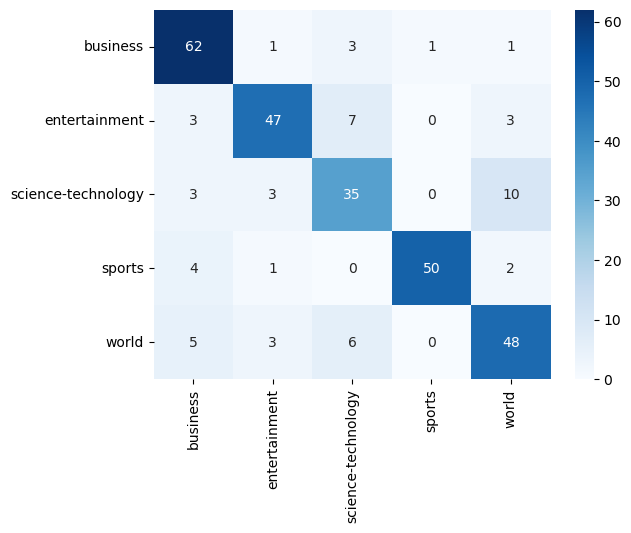

In [28]:
accuracy = accuracy_score(test_labels, predictions)
precision = precision_score(test_labels, predictions, average='macro', zero_division=0)
recall = recall_score(test_labels, predictions, average='macro', zero_division=0)
f1 = f1_score(test_labels, predictions, average='macro', zero_division=0)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

cm = confusion_matrix(test_labels, predictions)
# plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=np.unique(test_labels), yticklabels=np.unique(test_labels))